## Erste Analysen des Datensets
Erste Visualisierungen von Abhängigkeiten bzw. Korrelationen verschiedener Parameter.

### Datenset laden
Lädt Daten und zeigt Auszug der ersten paar Reihen.


In [1]:
import dataset.importer as im

df = im.get_dataset('dataset/dataset.csv')
df.head()

,id,source,verification_status,title,neubau_umbau,comment,nom_address,nom_zip,nom_location_name,nom_country,...,stlb_type,bool_has_attachments,dyn_kreis_type,nom_construction_start,nom_main_allocation_time,nom_construction_end,nom_bki_kostenstand,total_expenses,cost_ref_gf,cost_ref_gfs
5,1637,wbw_050_1986_4,VERIFIED_OK,"Loogarten, Zürich_BKP1",NEUBAU,Index und Anlagekosten i.O. BKP 2stellig nich...,Salzweg 1,8048.0,Zürich,SWITZERLAND,...,NONE,True,NaN,NaN,NaN,NaN,NaN,9265295.0,5793.0,13758.0
6,995,wbw_009_1983_6,VERIFIED_OK,Wohnsiedlung am Aabach in Mönchaltorf,NEUBAU,Alle Werte x 15 (Anzahl Häuser) genommen Nutz...,Seestrasse 20 - 48,8617.0,Mönchaltorf,SWITZERLAND,...,NONE,True,NaN,NaN,NaN,NaN,NaN,4069500.0,5067.0,9108.0
8,1787,wbw_002_1982_12,VERIFIED_OK,Reuss-Siedlung in Unterwindisch,NEUBAU,"Nutzung 2 überprüfen, die offene Einstellhall...","Ländestrasse 13, 15",5210.0,Unterwindisch,SWITZERLAND,...,NONE,True,NaN,NaN,NaN,NaN,NaN,1875000.0,2198.0,3290.0
9,2468,"wbw_020_1984_1,2",VERIFIED_OK,Regionalspital Sitten,NEUBAU,Kennwerte bereinigt BKP5 geschätzt!,Avenue du Grand Champsec 80,1951.0,Sitten,SWITZERLAND,...,NONE,True,NaN,NaN,NaN,NaN,NaN,83902401.0,21600.0,155000.0
11,1775,wbw_004_1982_12,VERIFIED_OK,Genossenschaftliche Wohnbauten in Zürich,NEUBAU,NaN,Gutstrasse 206 - 228,8003.0,Zürich,SWITZERLAND,...,NONE,True,NaN,NaN,NaN,NaN,NaN,16984000.0,16360.0,7057.0


<br>

---

<br>

### Correlation Heatmap
Zeigt Korrelationen zwischen unterschiedlichen Werten auf.

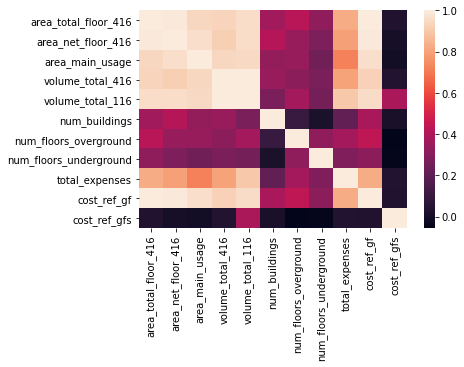

In [2]:
import seaborn as sns
import dataset.importer as im

filtered_df = im.select_relevant_features(df)
sns.heatmap(filtered_df.corr());

<br>

---

<br>

### Geschossfläche GF
Zeigt **Hauptnutzfläche** in relation zur **Geschossfläche**.

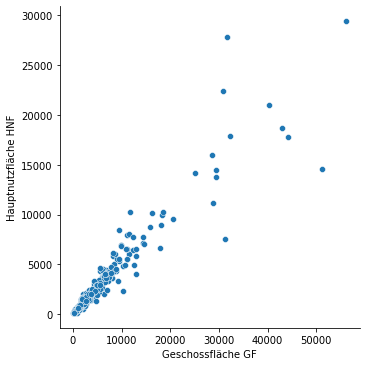

In [3]:
gf = sns.relplot(
    data=df,
    x=im.FIELD_AREA_TOTAL_FLOOR_416, y=im.FIELD_AREA_MAIN_USAGE,
    # hue=im.FIELD_NUM_FLOORS_OVERGROUND
    # size=im.FIELD_NUM_FLOORS_OVERGROUND,
    # sizes=(50, 100)
    # marker="s"
    # scatter_kws={"color":"darkred","alpha":0.3,"s":20}
)

gf.set(xlabel='Geschossfläche GF', ylabel='Hauptnutzfläche HNF')

<br>

---

<br>

### Geschossfläche GF
Zeigt **Hauptnutzfläche** in relation zur **Geschossfläche**.<br>
Zusätzliche Kategorisierung nach **Hauptnutzung**.<br>
<br>
Auffällige Ausreisser bei "Typ" Technik (deshalb entfernt von Grafik).

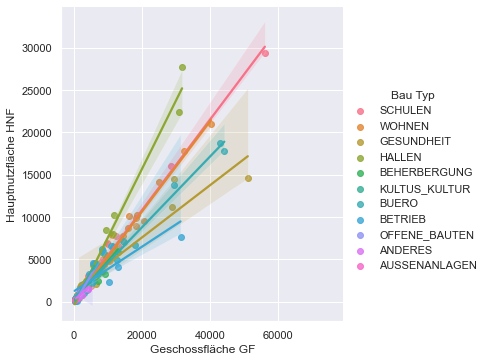

In [24]:
filtered_df = df[(df[im.FIELD_USAGE_CLUSTER] != 'IRRELEVANT') & (df[im.FIELD_USAGE_CLUSTER] != 'TECHNIK')]

gf = sns.lmplot(
    data=filtered_df,
    x=im.FIELD_AREA_TOTAL_FLOOR_416, y=im.FIELD_AREA_MAIN_USAGE,
    hue=im.FIELD_USAGE_CLUSTER
)

gf.set(xlabel='Geschossfläche GF', ylabel='Hauptnutzfläche HNF')
gf.legend.set_title('Bau Typ')

<br>

---

<br>